# Problem Statement:
The project (Code) analyzes the prior marketing campaign data of a Portugeuse bank and aims to predict whether the customer will subscribe to fixed-term deposit products the bank is offering. The code cleans the data, imputes the missing values, and analyzes and compares different predictive models. The best predictive model is used for the prediction exercise.

Comments and Explanations (in the form of Markdown) are included in the notebook to improve the readability of the code, to explain the rationale of doing certain steps and to discuss the results and inferences from the executed code.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns= None
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Reading CSV file

In [2]:
df= pd.read_csv('bank-additional-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Insights

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Checking for Null values

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Numeric features

In [6]:
df_num = df._get_numeric_data()
df_num.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


# Categorical features

In [7]:
df_catg = df.select_dtypes(exclude=[np.number])
df_catg.head(5)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


# Finding correlation of features

In [8]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)*100

# Important features based on correlation matrix

In [9]:
df_corr[df_corr['y'] > 20]['y']

duration           28.664835
pdays              21.713024
previous           23.018100
poutcome           27.037311
emp.var.rate       34.974224
cons.price.idx     37.001394
cons.conf.idx      37.001394
euribor3m          36.862392
nr.employed        37.473037
y                 100.000000
Name: y, dtype: float64

# Visualization

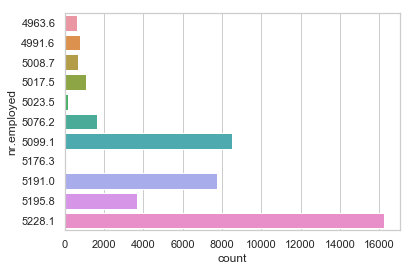

In [10]:
sns.countplot(y="nr.employed", data=df)
plt.show()

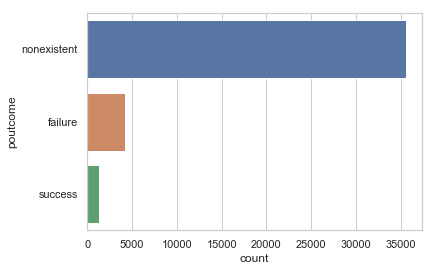

In [11]:
sns.countplot(y="poutcome", data=df)
plt.show()

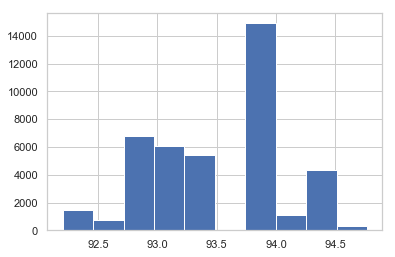

In [12]:
df["cons.price.idx"].hist()
plt.show()

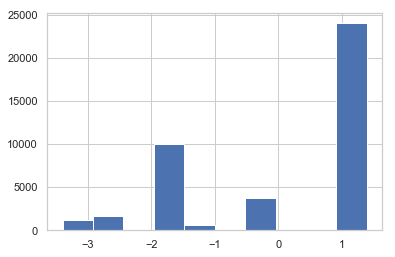

In [13]:
df['emp.var.rate'].hist()
plt.show()

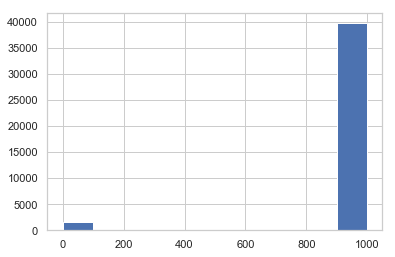

In [14]:
df['pdays'].hist()
plt.show()

In [15]:
# Dropping poutcome, duration, pdays since they will affect model's predictive power
df.drop(['duration','poutcome','pdays'],inplace=True,axis=1)

In [16]:
# Creating dummy values for target variable
df = pd.get_dummies(df, columns=['y'])

In [17]:
# Selecting features which have high correlation with target variable

df_final=df[['emp.var.rate','previous','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y_yes']]
df_final.head(5)

,emp.var.rate,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_yes
0,1.1,0,93.994,-36.4,4.857,5191.0,0
1,1.1,0,93.994,-36.4,4.857,5191.0,0
2,1.1,0,93.994,-36.4,4.857,5191.0,0
3,1.1,0,93.994,-36.4,4.857,5191.0,0
4,1.1,0,93.994,-36.4,4.857,5191.0,0


# Model Building

In [18]:
X = df_final.iloc[:,0:6]
y = df_final.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Logistic Regression

In [19]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

c:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_pred = classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [21]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.89


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7319
           1       0.57      0.10      0.18       919

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.74      0.55      0.56      8238
weighted avg       0.86      0.89      0.86      8238

[[7248   71]
 [ 824   95]]


# Decision Tree

In [24]:
decision_classifier = DecisionTreeClassifier(random_state=0)
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [25]:
y_pred1 = decision_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7319
           1       0.53      0.18      0.27       919

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.72      0.58      0.61      8238
weighted avg       0.86      0.89      0.87      8238

[[7168  151]
 [ 751  168]]


In [27]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred1)))

Accuracy of Decision Tree classifier on test set: 0.89


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier(random_state=0)

In [29]:
random_classifier.fit(X_train,y_train)

c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
y_pred2 = random_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(classification_report(y_test, y_pred2))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7319
           1       0.51      0.22      0.30       919

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.71      0.59      0.62      8238
weighted avg       0.86      0.89      0.87      8238

[[7131  188]
 [ 721  198]]


In [31]:
print('Accuracy of Random Forest Tree on test set: {:.2f}'.format(accuracy_score(y_test, y_pred2)))

Accuracy of Random Forest Tree on test set: 0.89
